## Advance Regression - Assignment

### Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market So the companh wants to know:
 - Which variables are significant in predicting the price of a house

 - How well those variables describe the price of a house

### 1. Importing all the necessary libraries

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

### 2. Reading and Understanding  the data

In [333]:
house_df = pd.read_csv('train.csv')

In [334]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [335]:
house_df.shape

(1460, 81)

> - Understanding the dataset by getting info() and describe() of a dataset

In [336]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [337]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### - Checking Null values

In [338]:
null_cols = house_df.columns[house_df.isnull().sum() != 0] # Gives only columns which is having null values 
house_df[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### > As we can see there are columns with null values, We can proceed with Data Cleaning

### 3. Data Cleaning

In [339]:
# Checking for null values on entire row
house_df.isnull().all(axis=1).sum()

0

In [340]:
# Checking for null values on entire column
house_df.isnull().all(axis=0).sum()

0

In [341]:
# Checking percentage of null values 
round(100 * house_df.isnull().sum()[(house_df.isnull().sum() > 0 )] / len(house_df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

###### > Remove columns which is having more than 15% of null values

In [342]:
# Removing columns which has more than 50% of null values
house_df.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [343]:
columnList = []   
for col in (house_df):
    if(house_df[col].value_counts().max() >= 1314):
        columnList.append(col)


# Remove the columns with skewed data
house_df.drop(columnList, axis = 1, inplace = True)

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


- As there are no unique values in columns removing ID columns which will not help in analysis

In [344]:
house_df.drop('Id', axis=1, inplace=True)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


- Dropping off records which contains missing values

In [345]:
# Check null values values after removing some columns
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

LotFrontage     17.74
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

- Imputing values 

In [346]:
# impute the value to fence columns
house_df["Fence"] = house_df["Fence"].astype('str')
house_df["Fence"] = house_df["Fence"].str.replace("nan", "No Fence")
# impute the value to nullable rows for GarageFinish
house_df["GarageFinish"] = house_df["GarageFinish"].fillna("No Garage")
house_df["LotFrontage"] = house_df["LotFrontage"].replace(np.nan, house_df["LotFrontage"].median())

- Analyze and impute basement columns

In [347]:
house_df["BsmtQual"] = house_df["BsmtQual"].fillna("None")
house_df["BsmtQual"].value_counts()/len(house_df)*100

house_df["BsmtCond"] = house_df["BsmtCond"].fillna("None")
house_df["BsmtCond"].value_counts()/len(house_df)*100

house_df["BsmtExposure"] = house_df["BsmtExposure"].fillna("None")
house_df["BsmtExposure"].value_counts()/len(house_df)*100

house_df["BsmtFinType1"] = house_df["BsmtFinType1"].fillna("None")
house_df["BsmtFinType1"].value_counts()/len(house_df)*100

house_df["BsmtFinType2"] = house_df["BsmtFinType2"].fillna("None")
house_df["BsmtFinType2"].value_counts()/len(house_df)*100

BsmtFinType2
Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: count, dtype: float64

In [348]:
# basement columns:
house_Basement = house_df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]
house_Basement.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,Unf,706,0,150,856
1,Gd,TA,Gd,ALQ,Unf,978,0,284,1262
2,Gd,TA,Mn,GLQ,Unf,486,0,434,920
3,TA,Gd,No,ALQ,Unf,216,0,540,756
4,Gd,TA,Av,GLQ,Unf,655,0,490,1145


<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

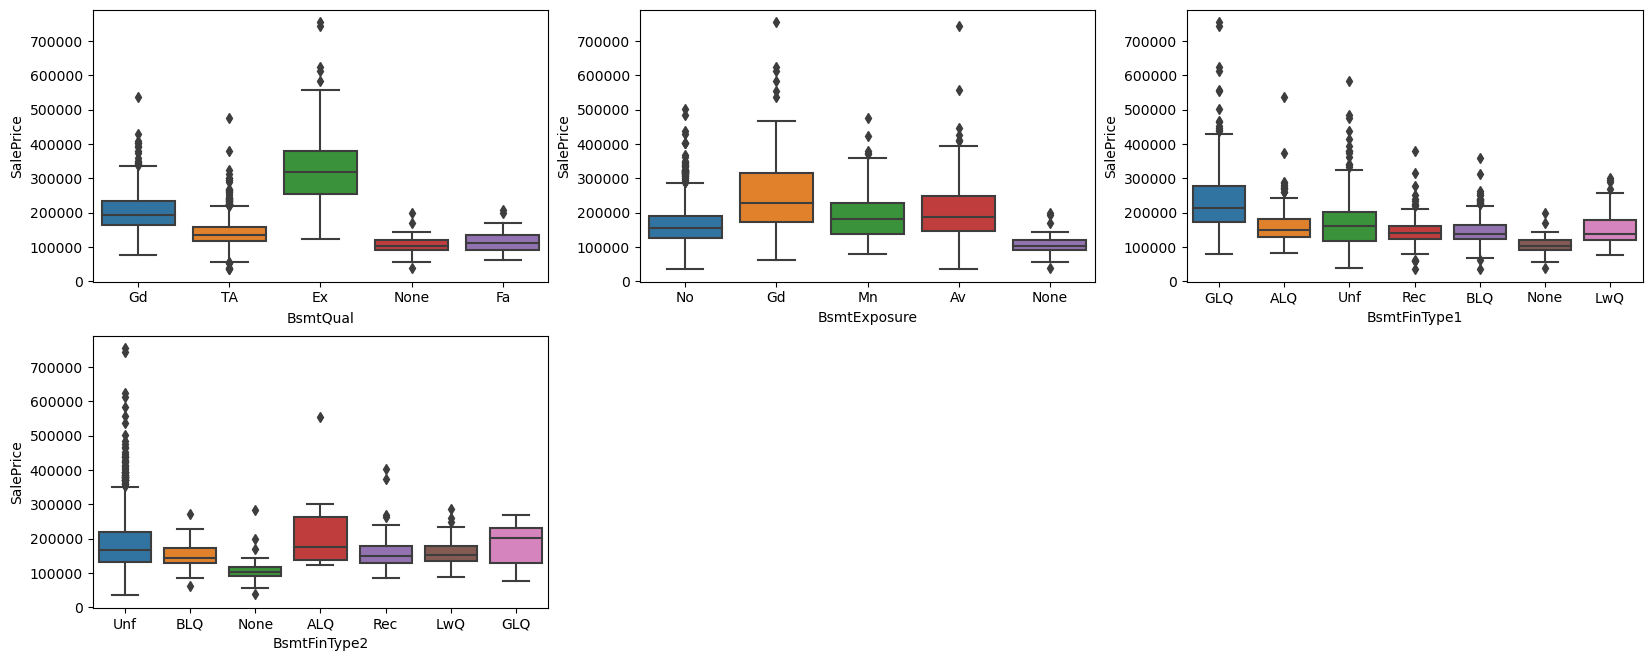

In [349]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = house_df)

In [350]:
# dropping some of the basement columns which is no influence on sale price
basementcolList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
house_df.drop(basementcolList, axis=1, inplace=True)
#cheking the shape of the house price data set after dropping basement variables
house_df.shape

(1460, 53)

In [351]:
# imputing MasVnrArea column null values
house_df["MasVnrArea"] = house_df["MasVnrArea"].replace(np.nan, house_df["MasVnrArea"].median())
house_df["MasVnrArea"] = house_df["MasVnrArea"].astype('int')
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

MasVnrType     59.73
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

- Analysing Garage columns

In [352]:
house_df["GarageYrBlt"] = house_df["GarageYrBlt"].fillna(0)
house_df["GarageType"] = house_df["GarageType"].astype('str')
house_df["GarageType"] = house_df["GarageType"].str.replace("nan", "No Garage")
house_df['GarageType'].value_counts()/len(house_df['GarageType'])*100

GarageType
Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: count, dtype: float64

In [353]:
house_df['GarageYrBlt'].value_counts()/len(house_df['GarageYrBlt'])*100
house_df["GarageQual"] = house_df["GarageQual"].str.replace("nan", "No Garage")
print(house_df['GarageQual'].value_counts()/len(house_df['GarageQual'])*100)

GarageQual
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: count, dtype: float64


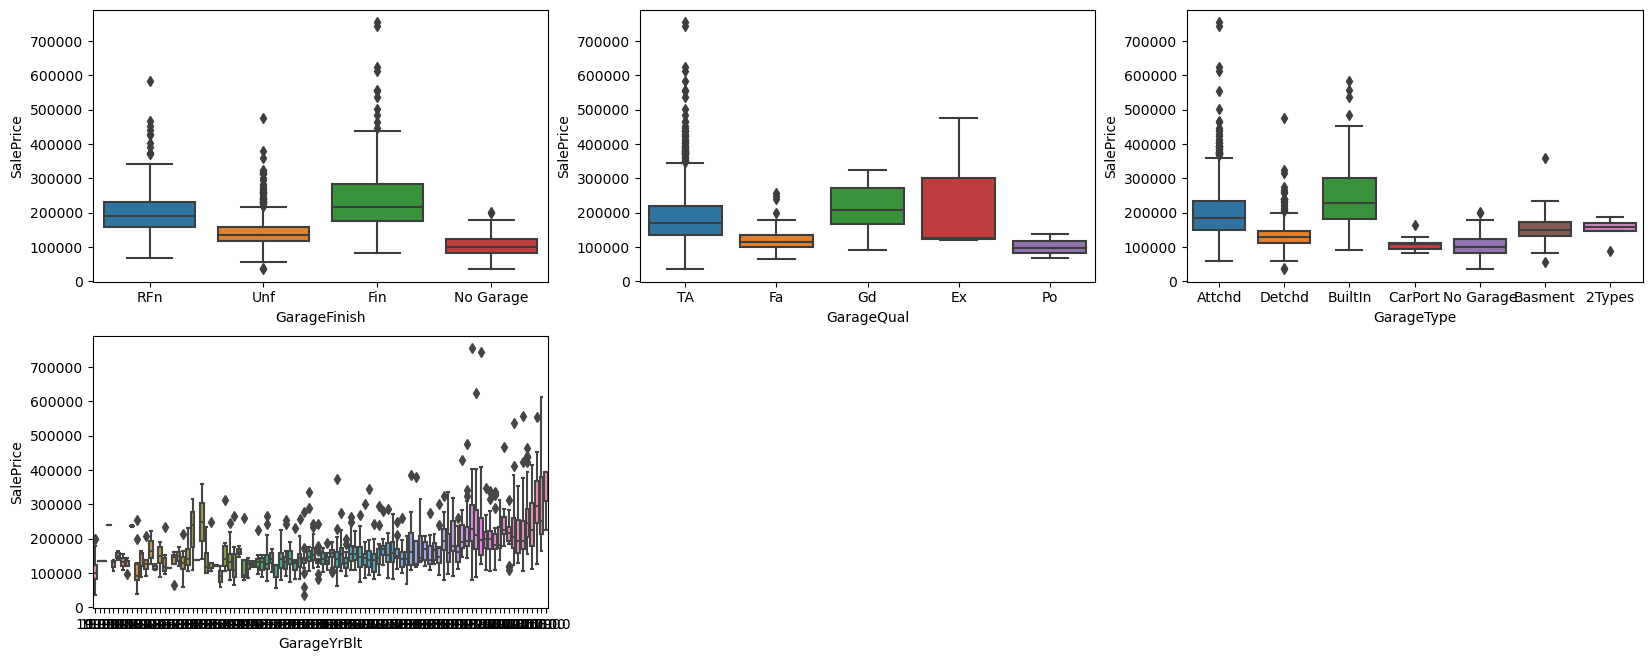

In [354]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = house_df)
plt.show()

In [355]:
house_df.drop("GarageQual", axis=1, inplace=True)
house_df.drop("MasVnrArea", axis=1, inplace=True)

In [356]:
house_df.shape

(1460, 51)

In [357]:
house_df["FireplaceQu"] = house_df["FireplaceQu"].fillna("No Fireplace")
house_df['MasVnrType'] = house_df['MasVnrType'].fillna("None")
house_df['MasVnrType'].value_counts()/len(house_df['MasVnrType'])*100
# Checking null values after cleaning the data set
round(100*house_df.isnull().sum()[(house_df.isnull().sum()>0)]/len(house_df), 2)

Series([], dtype: float64)

In [358]:
house_df.shape

(1460, 51)

In [359]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [360]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

### 4. Data Preparation

- Categorize columns into Numerical and Categorical

In [361]:
# Numerical columns
numerical_cols = ['MSSubClass', 'LotFrontage', 'LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                  'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath',
                  'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
                  'WoodDeckSF','OpenPorchSF','EnclosedPorch','MoSold','YrSold','SalePrice']
len(numerical_cols)

26

In [362]:
# Categorical columns
categorical_cols = [ 'MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
                    'HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                    'BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish',
                    'Fence','SaleType','SaleCondition']
len(categorical_cols)

25

## EDA

### Data Visualization

In [363]:
# Correlation between all variables
numeric_house = house_df.select_dtypes(include=[float, int])
house_corr = numeric_house.corr()
house_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.238518,-0.251758,0.307886,...,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.363472,0.413773,0.072388,...,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.299475,0.050986,...,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.476224,0.295493,...,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.144203,0.028942,...,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.281986,0.010308,...,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.240379,0.140024,...,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.021490,0.035743,0.507101
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,0.819530,-0.174512,...,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.413773,0.299475,0.476224,-0.144203,0.281986,0.240379,0.819530,1.000000,-0.202646,...,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.031372,-0.013604,0.605852
2ndFlrSF,0.307886,0.072388,0.050986,0.295493,0.028942,0.010308,0.140024,-0.174512,-0.202646,1.000000,...,0.194561,0.064402,0.183926,0.138347,0.092165,0.208026,0.061989,0.035164,-0.028700,0.319334


### Correlation of independant variables wrt SalePrice

   - Overall material and finish of the house, Original construction date, total rooms, number of bathrooms,  garage size, garage area, total basement area, first floor area are highly correlated with Saleprice variable.
   - few variables are negatively correlated with Saleprice

##### > Heat map to visualize correlation

<Axes: >

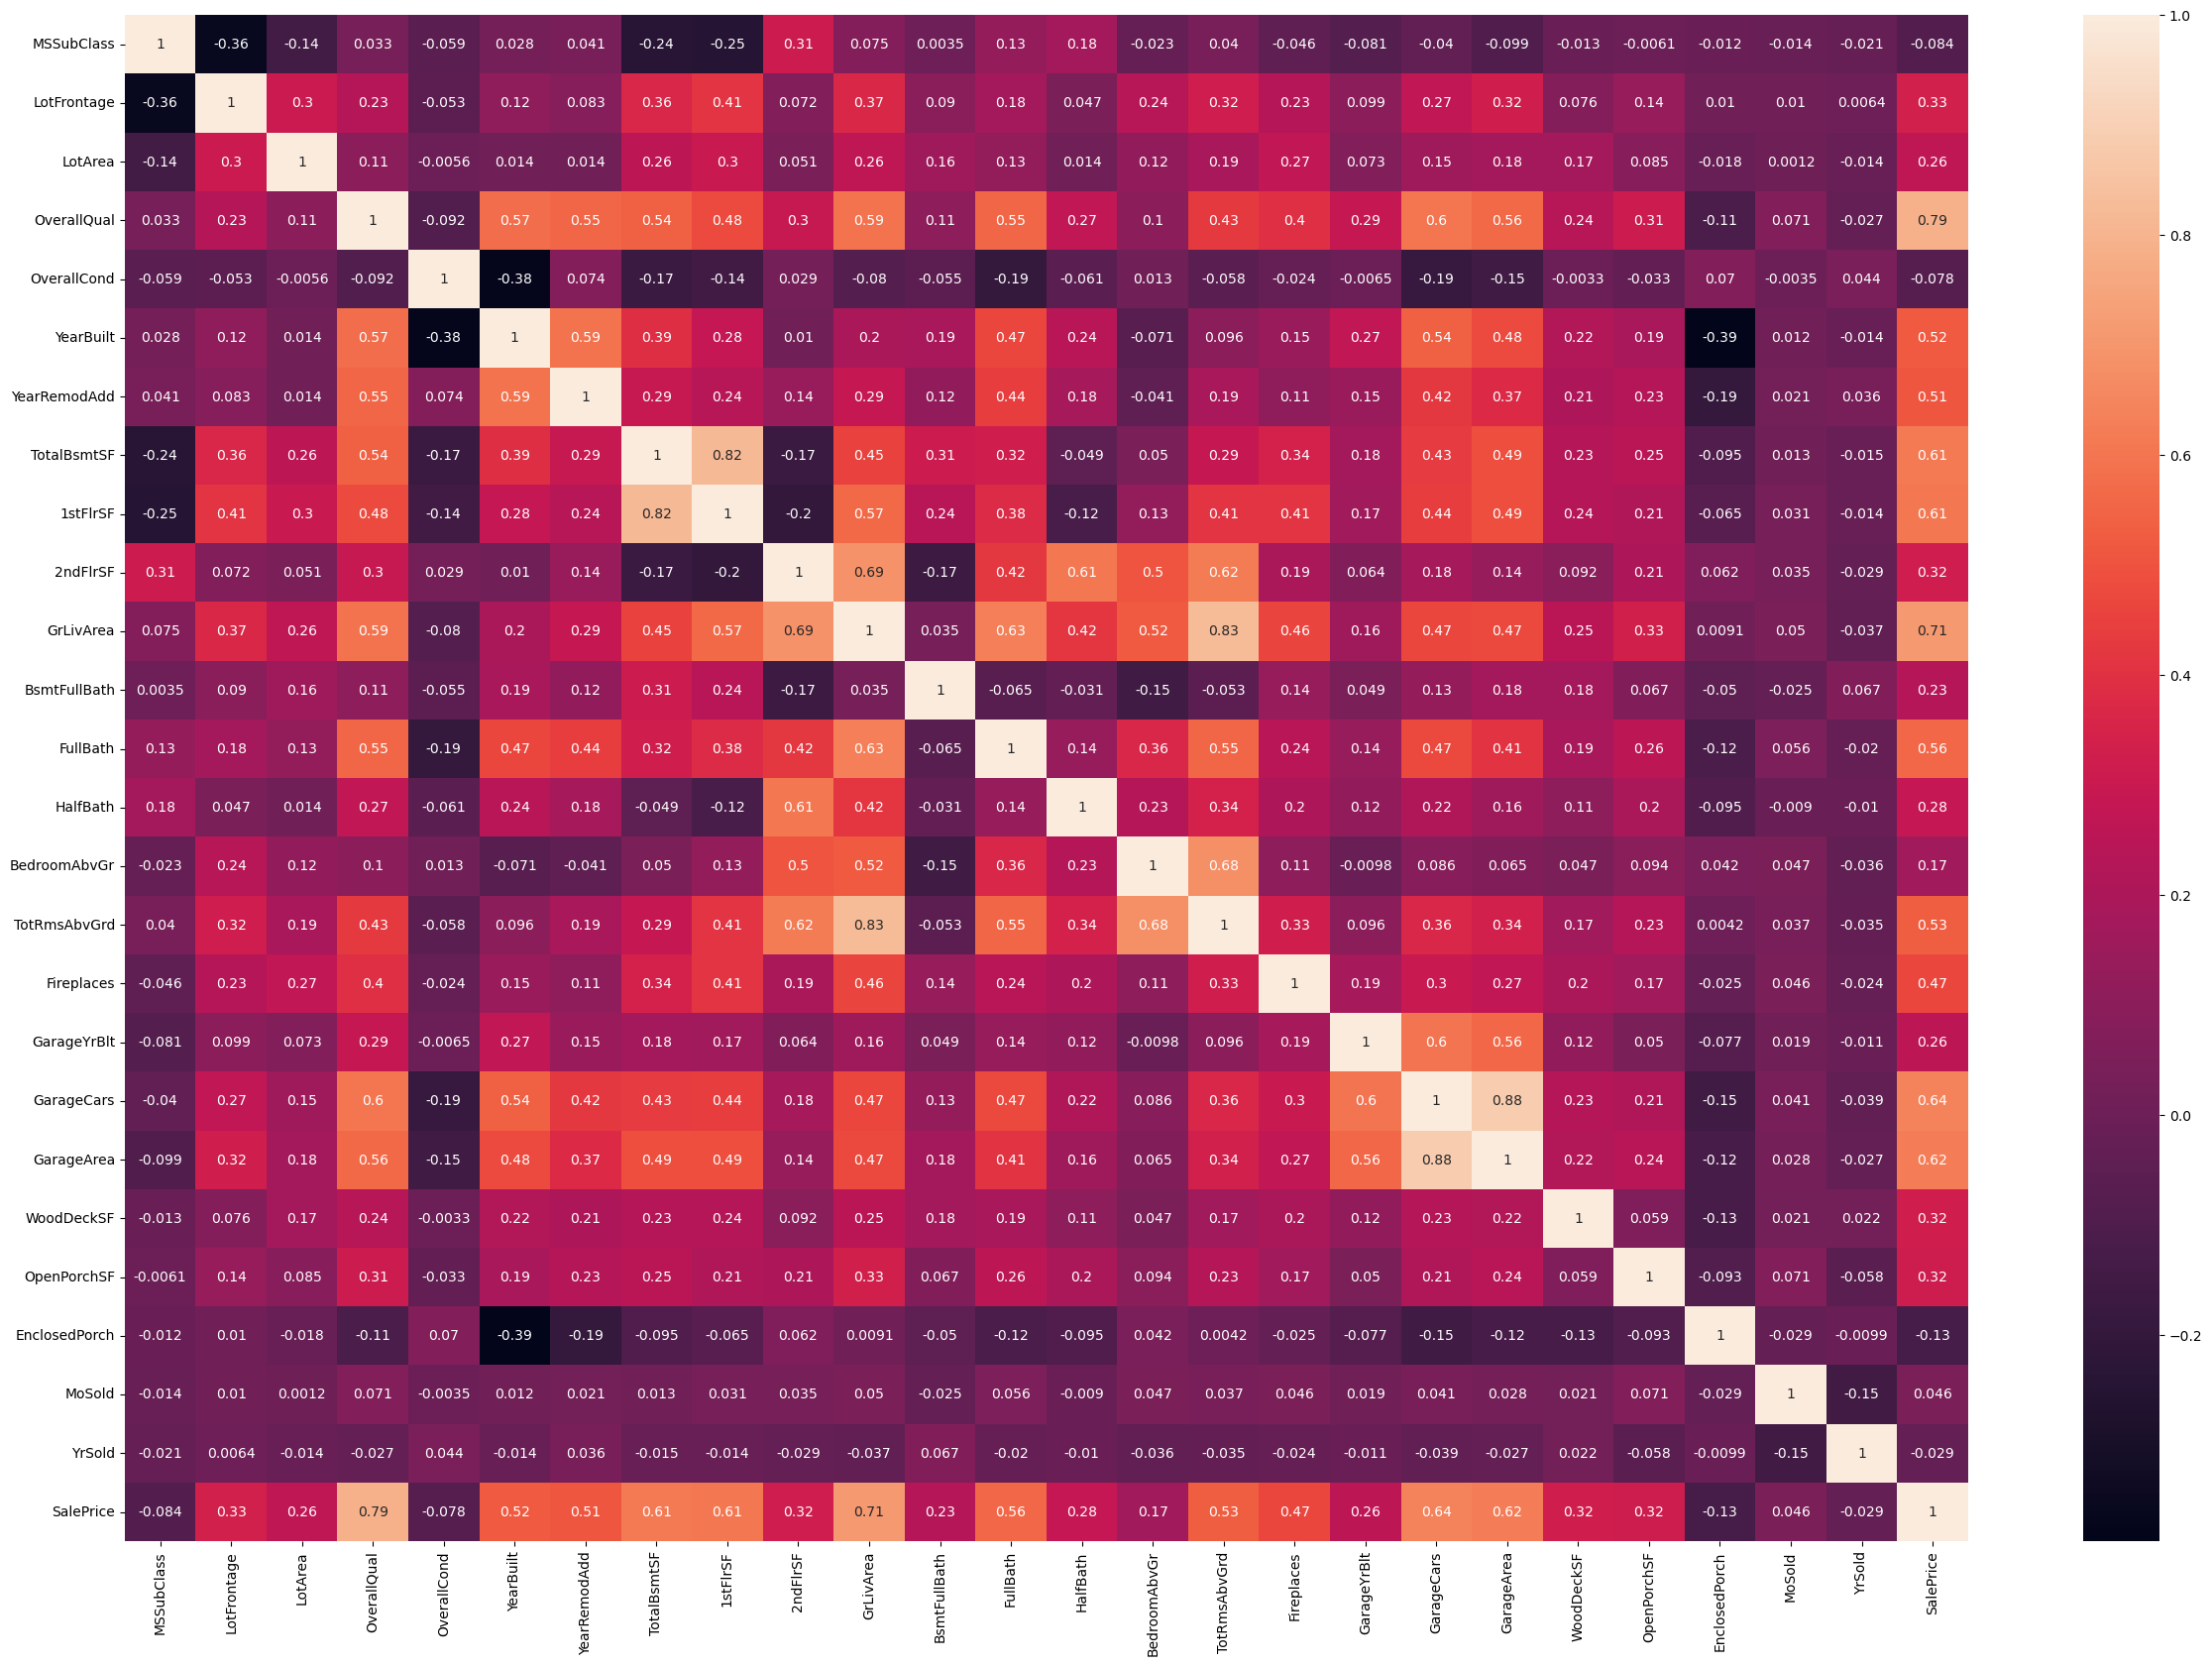

In [364]:
plt.figure(figsize=(30,20))
house_corr = numeric_house.corr()
sns.heatmap(house_corr, annot=True)

### Checking and Removing outliers

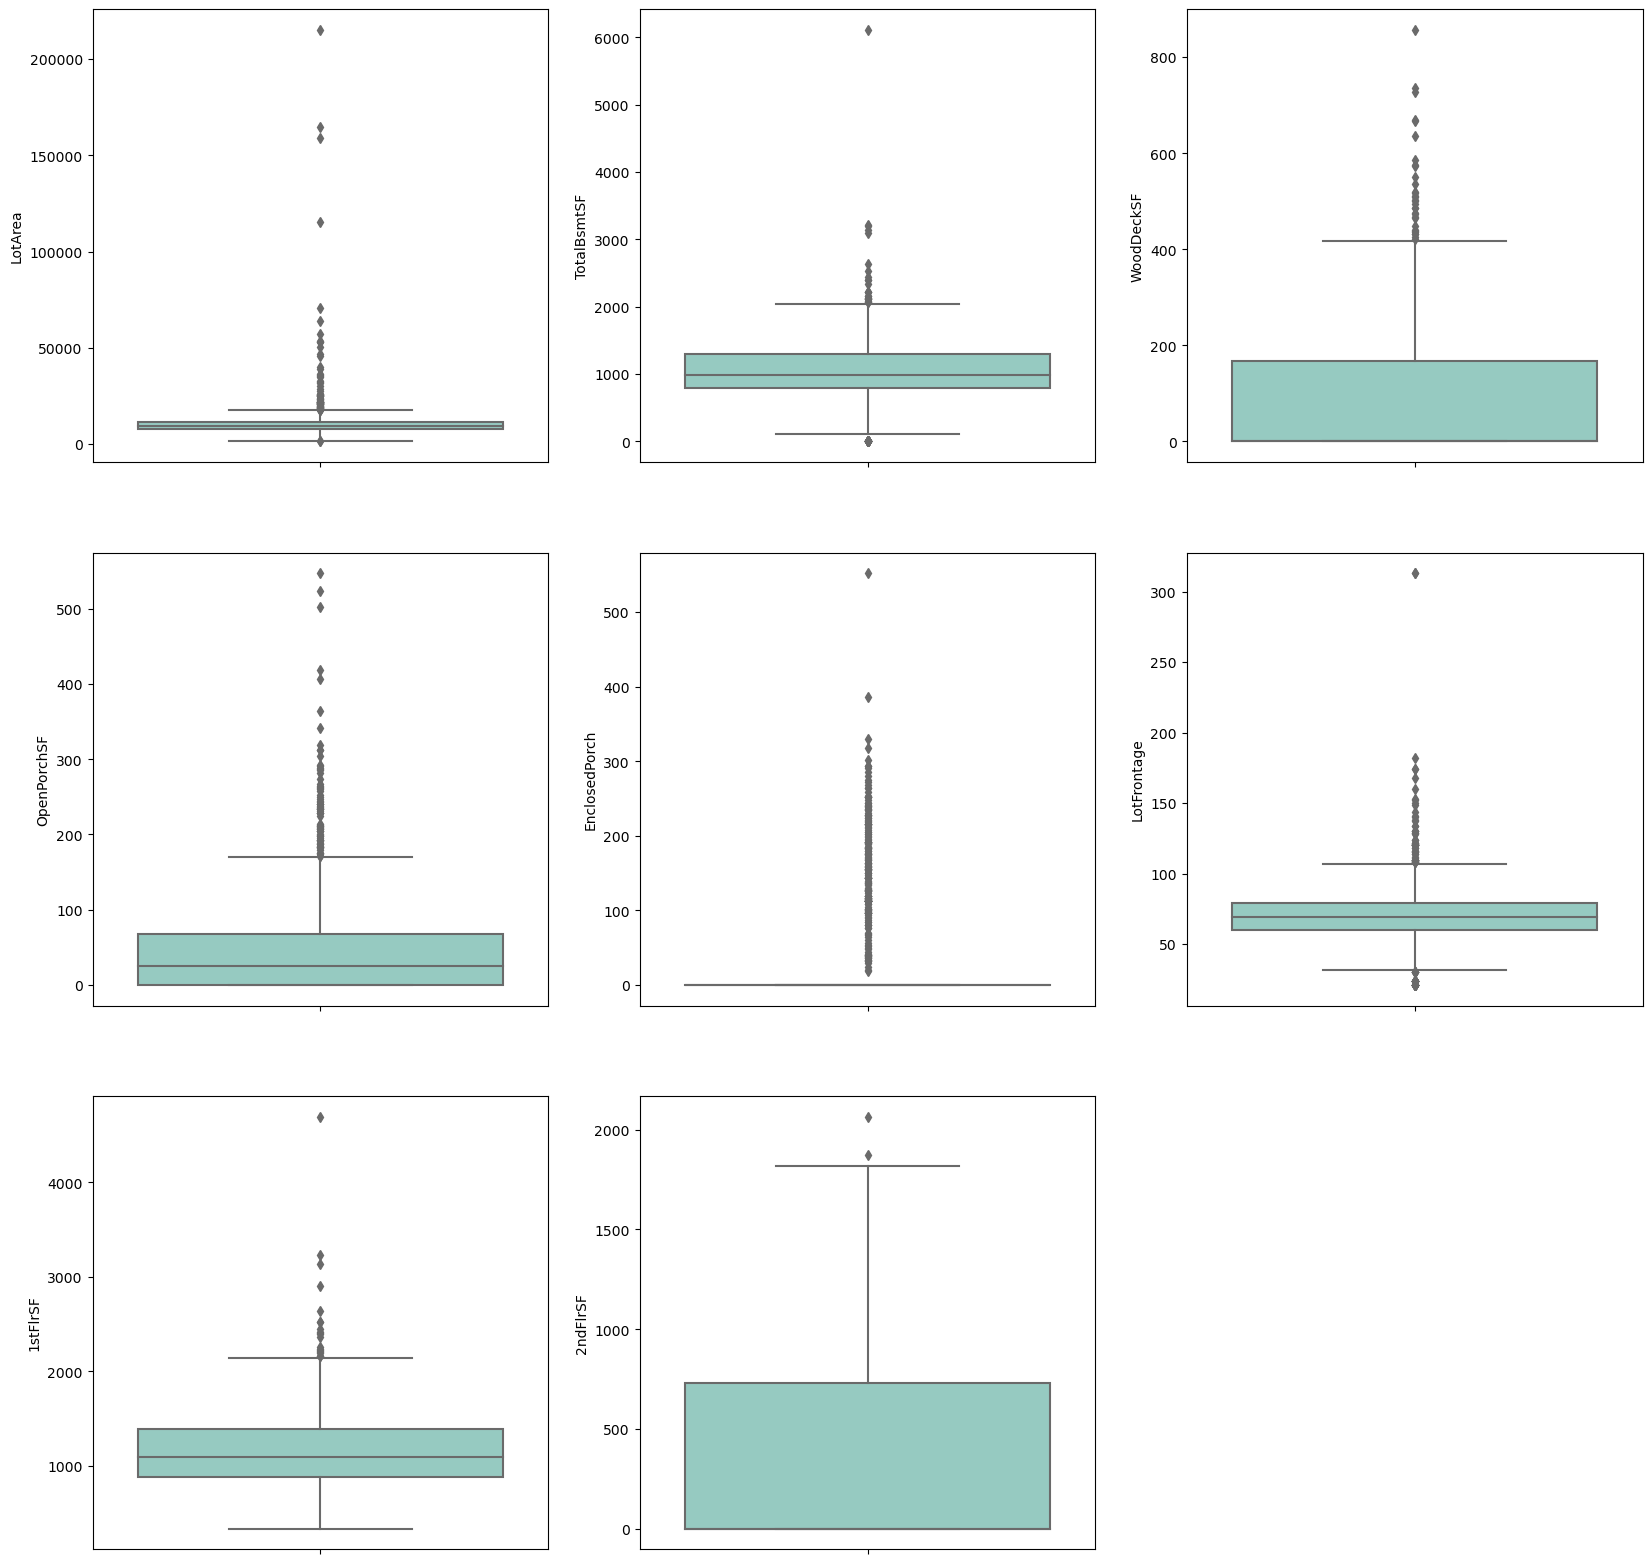

In [365]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = house_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = house_df)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = house_df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = house_df)

plt.show()


In [366]:
# Removing Outliers

# Removing values beyond 99% for LotArea
house_df = house_df[house_df["LotArea"] < house_df['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
house_df = house_df[house_df["TotalBsmtSF"] < house_df['TotalBsmtSF'].quantile(0.99)]


# Removing values beyond 99% for WoodDeckSF
house_df = house_df[house_df["WoodDeckSF"] < house_df['WoodDeckSF'].quantile(0.99)]


# Removing values beyond 99% for OpenPorchSF
house_df = house_df[house_df["OpenPorchSF"] < house_df['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
house_df = house_df[house_df["EnclosedPorch"] < house_df['EnclosedPorch'].quantile(0.99)]

In [367]:
house_df.shape

(1386, 51)

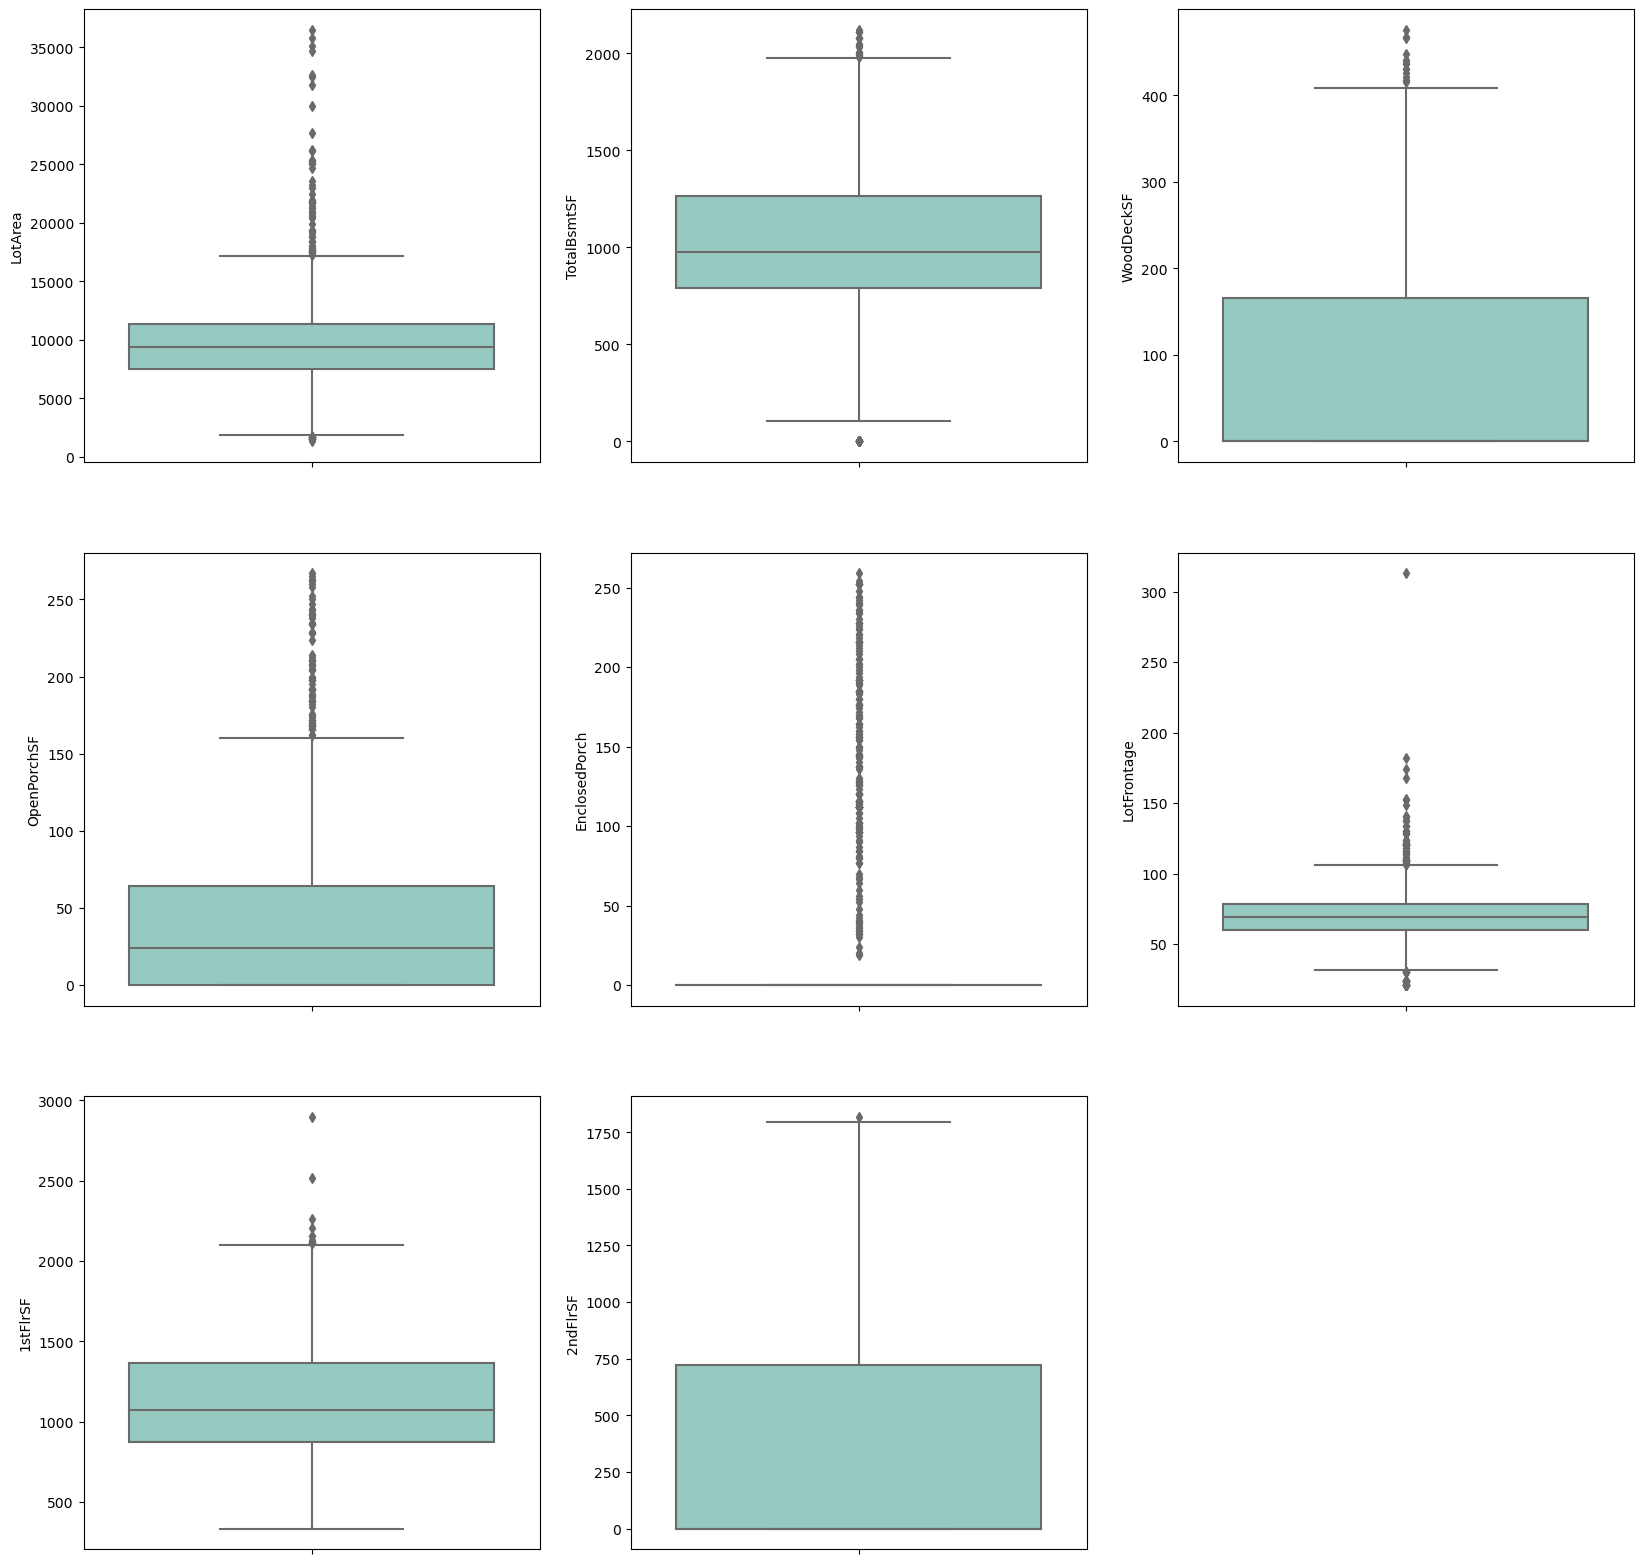

In [368]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = house_df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = house_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = house_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = house_df)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = house_df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = house_df)

plt.show()


In [370]:
num_data = round(100*(len(house_df)/1460),2)
print(num_data)

94.93


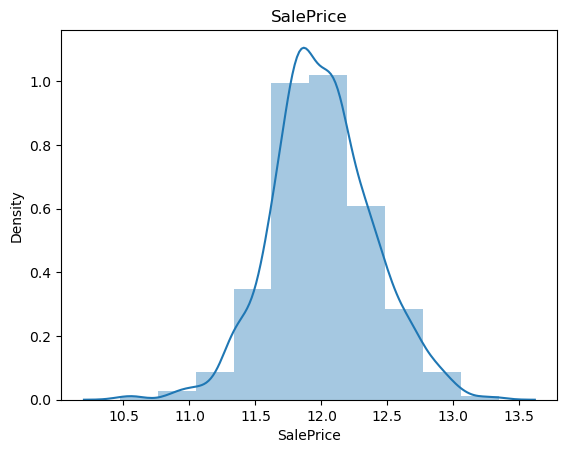

In [371]:
# transform the sales price
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_df['SalePrice'], bins=10)
plt.show()

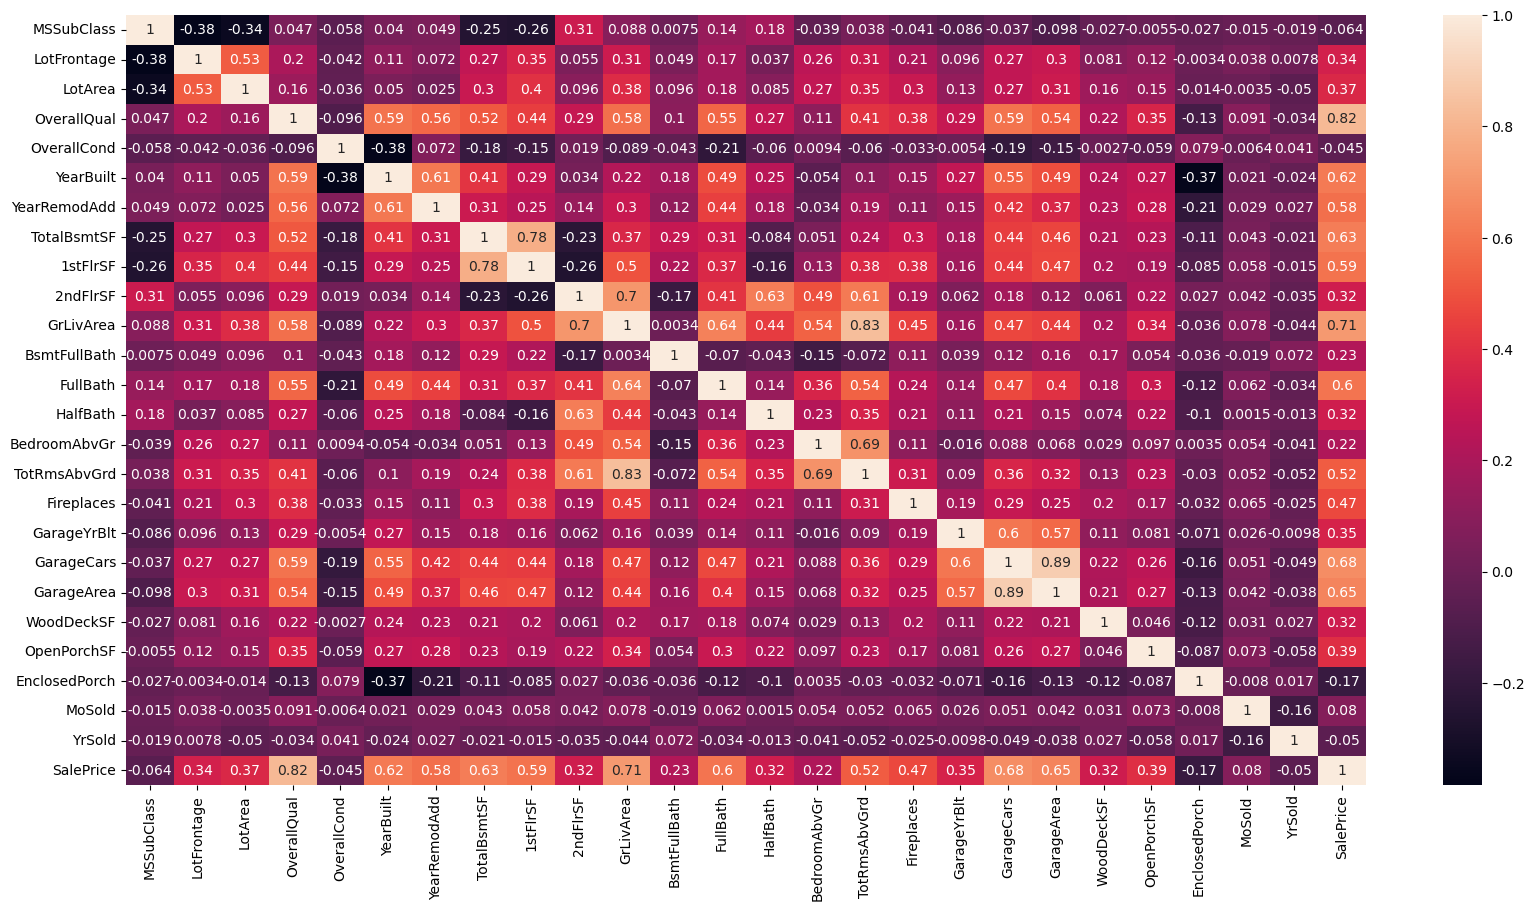

In [374]:
plt.figure(figsize = (20, 10))
numeric_house = house_df.select_dtypes(include=[float, int])
sns.heatmap(numeric_house.corr(), annot = True)
plt.show()

In [375]:
# Removing variables which are highly correlated
house_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)
house_df.shape

(1386, 49)

In [391]:
house_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
4,2000,2000,2000.0,2008
5,1993,1995,1993.0,2009


In [392]:
house_df.shape

(1386, 49)

In [393]:
house_df[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,Gd,Gd,TA,Ex,Gd,RFn,TA,Reg
1,TA,Gd,TA,Ex,TA,RFn,TA,Reg
2,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
4,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
5,TA,Gd,TA,Ex,TA,Unf,TA,IR1


In [394]:
house_df['ExterQual'] = house_df['ExterQual'].astype('category')
house_df['BsmtQual'] = house_df['BsmtQual'].astype('category')
house_df['BsmtCond'] = house_df['BsmtCond'].astype('category')
house_df['HeatingQC'] = house_df['HeatingQC'].astype('category')
house_df['KitchenQual'] = house_df['KitchenQual'].astype('category')
house_df['GarageFinish'] = house_df['GarageFinish'].astype('category')
house_df['ExterCond'] = house_df['ExterCond'].astype('category')
house_df['LotShape'] = house_df['LotShape'].astype('category')
house_df['Neighborhood'] = house_df['Neighborhood'].astype('category')

In [395]:
house_df['ExterQual'] = house_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['FireplaceQu'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
house_df['GarageFinish'] = house_df.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['LotShape'] = house_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house_df['Fence'] = house_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [396]:
#columns change to numerical
house_df[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,3,4,3,4,3,2,2,3
1,2,4,3,4,2,2,2,3
2,3,4,3,4,3,2,2,0
4,3,4,3,4,3,2,2,0
5,2,4,3,4,2,1,2,0


In [397]:
# categorical columns
house_df[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Neighborhood,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
1,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Veenker,Attchd,WD,Normal
2,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
4,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,NoRidge,Attchd,WD,Normal
5,RL,Lvl,Inside,Norm,1Fam,1.5Fin,Gable,VinylSd,VinylSd,None,Wood,Mitchel,Attchd,WD,Normal


In [398]:
house_df.shape

(1386, 49)

In [399]:
houseDummy = pd.get_dummies(house_df[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [400]:
houseNew = pd.concat([house_df, houseDummy], axis='columns')

In [401]:
# dropping the actual variables after getting the dummys
houseNew = houseNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
print(houseNew.shape)

(1386, 149)


## Data Preparation and Modelling

### Splitting the data into training and test set

In [403]:
house_train, house_test = train_test_split(houseNew, train_size=0.7, random_state=100)

In [404]:
print(house_train.shape)
print(house_test.shape)

(970, 149)
(416, 149)


### Scaling the dataset

In [405]:
y_train = house_train.pop('SalePrice')
X_train = house_train

In [406]:
y_test = house_test.pop('SalePrice')
X_test = house_test

###### Scaling the Numerical Variables

In [407]:
scalar = MinMaxScaler()
num_cols = X_train.dtypes[X_train.dtypes != 'object'].index
X_train[num_cols]  = scalar.fit_transform(X_train[num_cols])

In [408]:
X_test[num_cols] = scalar.transform(X_test[num_cols])

In [409]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
952,0.382353,0.133562,0.171213,1.0,0.444444,0.875,0.729927,0.883333,0.333333,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.176471,0.113014,0.185171,0.0,0.444444,0.625,0.357664,0.000000,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.294118,0.154110,0.161288,1.0,0.555556,0.375,0.313869,0.000000,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,0.941176,0.000000,0.005136,1.0,0.333333,0.375,0.715328,0.333333,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,0.352941,0.164384,0.265467,0.0,0.555556,0.625,0.729927,0.366667,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [410]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 952 to 835
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: float64(148)
memory usage: 1.1 MB


In [411]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,0.221983,0.163226,0.241920,0.658763,0.564719,0.573711,0.726315,0.581701,0.461168,0.361856,...,0.025773,0.048454,0.079381,0.016495,0.049485,0.046392,0.057732,0.018557,0.025773,0.006186
std,0.254330,0.070218,0.123447,0.467061,0.149123,0.139028,0.217832,0.342365,0.187114,0.116271,...,0.158540,0.214834,0.270473,0.127434,0.216989,0.210441,0.233356,0.135023,0.158540,0.078445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.177046,0.000000,0.444444,0.500000,0.598540,0.283333,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.164384,0.234533,1.000000,0.555556,0.500000,0.733577,0.733333,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.195205,0.291033,1.000000,0.666667,0.625000,0.934307,0.900000,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [412]:
y_train.head()

952     11.804856
1178    11.950541
565     11.759793
1039    11.289794
516     11.970357
Name: SalePrice, dtype: float64

### Data Modelling using RFE

In [413]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [414]:
# Coef, intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.43432623e-02  4.70919708e-02  1.87811417e-01  3.42344612e-03
  4.54734438e-01  3.48423399e-01  2.27614672e-01  2.84141528e-02
 -3.92866438e-02  5.08059225e-03 -3.11093930e-02  1.11471658e-03
  3.26459777e-01  3.84545040e-02 -1.94216988e-01 -5.40739380e-02
  1.00776861e+00  1.31779553e-01  9.64138938e-03  2.62495910e-02
 -4.00284144e-02  5.62272141e-02  3.48747786e-02  2.33451854e-02
  1.26770339e+00  1.75866499e-02  1.78950120e-01  5.72386624e-02
  5.38744991e-02  1.66953401e-02 -2.26863789e-02 -1.45757480e-02
 -6.53492715e-03  3.64715398e-01  2.80203191e-01  3.08566154e-01
  2.75951586e-01  1.32713285e-02 -4.58111496e-02  5.64947880e-03
  1.20653310e-02 -1.63971844e-02 -4.12331978e-02 -1.40128869e-02
  3.92985367e-02  9.28399550e-02 -3.83077729e-03  5.59548504e-02
 -4.84071489e-02  7.72480770e-02  1.90766156e-02  1.20537528e-01
 -5.45586727e-02 -4.85430339e-02 -1.17641655e-01 -7.10237375e-02
 -2.98330279e-02  2.53518613e-03 -1.41328774e-03 -2.81353786e-02
 -1.05897127e-02  1.24454

In [415]:
rfe = RFE(lm, n_features_to_select=90)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=90)

In [326]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 45),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 73),
 ('BedroomAbvGr', False, 32),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 44),
 ('EnclosedPorch', False, 24),
 ('MoSold', False, 37),
 ('YrSold', False, 39),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 86),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 82),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 29),
 ('LotConfig_FR2

In [416]:
# RFE selected features
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_Low', 'LotConfig_FR3',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exter

In [417]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['MSSubClass', 'LotFrontage', 'LotShape', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', '2ndFlrSF', 'FullBath', 'HalfBath',
       'FireplaceQu', 'GarageFinish', 'EnclosedPorch', 'Fence', 'MoSold',
       'YrSold', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_Inside', 'Condition1_PosA',
       'Condition1_RRNe', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'Exterior1st_MetalSd', 'Exterior1st_Stone',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_Slab',
       'SaleType_ConLw', 'SaleType_WD', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
 

In [418]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [242]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_Oth,SaleCondition_Partial
1388,1.0,0.086189,0.976744,0.950000,0.584071,0.000000,0.182363,0.530210,0.460109,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1057,1.0,0.181731,0.883721,0.733333,0.263274,0.000000,0.161815,0.280452,0.180692,0.465278,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
571,1.0,0.038250,0.612403,0.150000,0.183186,0.000000,0.192637,0.245234,0.138798,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
173,1.0,0.056417,0.627907,0.183333,0.127434,0.253731,0.299658,0.406139,0.320219,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
732,1.0,0.064071,0.914729,0.816667,0.111504,0.000000,0.385702,0.338611,0.244080,0.469017,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [419]:
# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.229e+05
Date:                Wed, 22 May 2024   Prob (F-statistic):                        0.00
Time:                        20:58:05   Log-Likelihood:                          771.90
No. Observations:                 970   AIC:                                     -1370.
Df Residuals:                     883   BIC:                                     -945.5
Df Model:                          87                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.2173      0.045      4.835      0.000       0.129       0.306
OverallQual               0.4249      0.049      8.660      0.000       0.329       0.521
OverallCond               0.3853      0.037     10.502      0.000       0.313       0.457
YearBuilt                 0.0295      0.046      0.648      0.517      -0.060       0.119
YearRemodAdd             -0.0229      0.018     -1.247      0.213      -0.059       0.013
TotalBsmtSF               0.3275      0.043      7.625      0.000       0.243       0.412
HeatingQC                 0.0232      0.022      1.074      0.283      -0.019       0.066
1stFlrSF                 -0.1343      0.061     -2.186      0.029      -0.255      -0.014
GrLivArea                 0.9395      0.053     17.569      0.000       0.835       1.044
BsmtFullBath              0.1296      0.017      7.684      0.000       0.097       0.163
BedroomAbvGr             -0.0123      0.056     -0.220      0.826      -0.122       0.097
KitchenQual               0.0748      0.028      2.662      0.008       0.020       0.130
Fireplaces                0.1145      0.023      4.982      0.000       0.069       0.160
GarageYrBlt              10.5674      0.126     84.144      0.000      10.321      10.814
GarageCars                0.0377      0.037      1.021      0.307      -0.035       0.110
WoodDeckSF                0.0348      0.018      1.937      0.053      -0.000       0.070
OpenPorchSF               0.0329      0.020      1.605      0.109      -0.007       0.073
MSZoning_FV               0.3955      0.064      6.172      0.000       0.270       0.521
MSZoning_RH               0.3318      0.070      4.730      0.000       0.194       0.469
MSZoning_RL               0.3560      0.061      5.851      0.000       0.237       0.475
MSZoning_RM               0.3394      0.059      5.792      0.000       0.224       0.454
LandContour_Low          -0.0517      0.030     -1.711      0.087      -0.111       0.008
LotConfig_FR3             0.0473      0.089      0.531      0.595      -0.128       0.222
Condition1_Feedr          0.0409      0.025      1.634      0.103      -0.008       0.090
Condition1_Norm           0.0840      0.020      4.251      0.000       0.045       0.123
Condition1_PosN           0.0407      0.039      1.037      0.300      -0.036       0.118
Condition1_RRAe          -0.0471      0.041     -1.136      0.256      -0.128       0.034
Condition1_RRAn           0.0430      0.035      1.214      0.225      -0.027       0.113
Condition1_RRNn           0.1451      0.066      2.206      0.028       0.016       0.274
BldgType_2fmCon          -0.0300      0.028     -1.062      0.288      -0.086       0.025
BldgType_Duple

- As the statistics says there are strong multicollinearity, we have to check VIF(Variance Inflation Factor)

In [420]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,LotArea,11.03
1,OverallQual,60.83
2,OverallCond,34.74
3,YearBuilt,88.24
4,YearRemodAdd,11.35
...,...,...
85,Neighborhood_Mitchel,1.23
86,Neighborhood_NPkVill,1.35
87,Neighborhood_NridgHt,1.62
88,Neighborhood_OldTown,3.17


#### 90 columns has been selected by RFE technique to build Linear Regression Model with Adjusted R-Sqquared values of 90.1%

- As VIF shows inf which is having Multicollinearity

In [421]:
# We can delete the columns which are rejected by RFE
X_train = X_train[col]
X_test = X_test[col]

In [422]:
X_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_StoneBr
952,0.171213,0.444444,0.875,0.729927,0.883333,0.363981,0.75,0.169267,0.131795,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.185171,0.444444,0.625,0.357664,0.000000,0.346445,1.00,0.189548,0.306408,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.161288,0.555556,0.375,0.313869,0.000000,0.381991,0.50,0.197738,0.398725,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,0.005136,0.333333,0.375,0.715328,0.333333,0.298578,0.50,0.115445,0.089888,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
516,0.265467,0.555556,0.625,0.729927,0.366667,0.326540,0.50,0.407176,0.542059,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Advanced Regression - Ridge Regression

In [423]:
# List of different values for alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [248]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010415,0.002416,0.005569,0.001543,0.0001,{'alpha': 0.0001},-17741.275655,-16509.056355,-18878.939569,-15371.665112,...,-17908.829042,1959.085893,21,-14729.292394,-15038.937561,-14340.568882,-15571.211861,-14168.030952,-14769.608330,502.533983
1,0.014909,0.004692,0.007024,0.002760,0.001,{'alpha': 0.001},-17741.985371,-16505.046638,-18877.777141,-15363.710136,...,-17901.839727,1954.395077,20,-14730.080099,-15041.145164,-14342.412499,-15571.669051,-14169.475345,-14770.956431,502.243551
2,0.007962,0.001057,0.005074,0.003031,0.01,{'alpha': 0.01},-17748.372517,-16507.468706,-18867.172867,-15292.087679,...,-17851.589671,1915.588294,18,-14737.870488,-15060.902098,-14358.442756,-15576.766158,-14182.405070,-14783.277314,500.058737
3,0.013663,0.006067,0.006388,0.002487,0.05,{'alpha': 0.05},-17768.359210,-16548.966761,-18831.758130,-15086.844184,...,-17709.980085,1803.960233,16,-14768.295410,-15123.257798,-14404.775788,-15597.119795,-14221.135827,-14822.916923,495.895298
4,0.010558,0.004536,0.005623,0.002169,0.1,{'alpha': 0.1},-17778.418191,-16587.578125,-18800.527376,-14953.256815,...,-17602.934646,1718.710919,15,-14801.514984,-15177.515779,-14446.473931,-15626.579898,-14253.136777,-14861.044274,496.218266


In [424]:
# the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [425]:
# Building ridge regression with optimal alpha value
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.11003133e-01  4.67799696e-01  3.42859458e-01  2.83978310e-01
  3.63254267e-02  2.98513148e-01  3.97328968e-02 -6.71798404e-02
  8.75819479e-01  1.18567813e-01 -5.05131748e-02  6.53980979e-02
  7.57153949e-02  3.10382880e-02  1.91965934e-01  6.19437965e-02
  5.11158430e-02  2.75217943e-01  1.93208999e-01  2.26072290e-01
  1.91044114e-01 -4.60543738e-02 -2.76888599e-02  4.52411130e-02
  8.56028533e-02  4.77602773e-02 -3.82911365e-02  7.64031441e-02
  1.12884045e-01 -2.48856340e-02 -3.47835690e-02 -1.13074920e-01
 -5.66077687e-02  5.31720994e-02 -5.04032548e-02  2.66194104e-02
  3.04975617e-02 -1.28458768e-01 -8.25370577e-02 -1.21293781e-01
 -6.73890446e-02  5.44890479e-04  0.00000000e+00 -2.32809150e-01
  1.19336792e-01  3.95157099e-02 -7.01680119e-02  3.95636882e-02
  5.94680178e-02  3.23568841e-02  4.88545199e-02 -4.17847779e-02
  3.00631241e-02  3.95157099e-02  1.21679415e-01  6.12654285e-02
 -6.97133546e-02  3.91021298e-02  7.15905909e-02  3.79714614e-02
  5.82205099e-02 -1.22894

In [426]:
# Predticting on X_train
y_train_pred = ridge.predict(X_train)

# Checking the r2_score
ridge_train = r2_score(y_train, y_train_pred)
print('r2_train_ridge:', ridge_train)

# Predicting on the X_test
y_test_pred = ridge.predict(X_test)

# Checking the r2_score
ridge_test = r2_score(y_test, y_test_pred)
print('r2_test_ridge:', ridge_test)

r2_train_ridge: 0.9329814513808519
r2_test_ridge: 0.8987681391856739


In [427]:
# display the mean scores
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.3,-0.070734,-0.080737,1
7,0.4,-0.070949,-0.080768,2
5,0.2,-0.070534,-0.080792,3
8,0.5,-0.071168,-0.080844,4
4,0.1,-0.070357,-0.080902,5
9,0.6,-0.071386,-0.080963,6
3,0.05,-0.070271,-0.080989,7
10,0.7,-0.071607,-0.081075,8
2,0.01,-0.070193,-0.081086,9
1,0.001,-0.070208,-0.081176,10


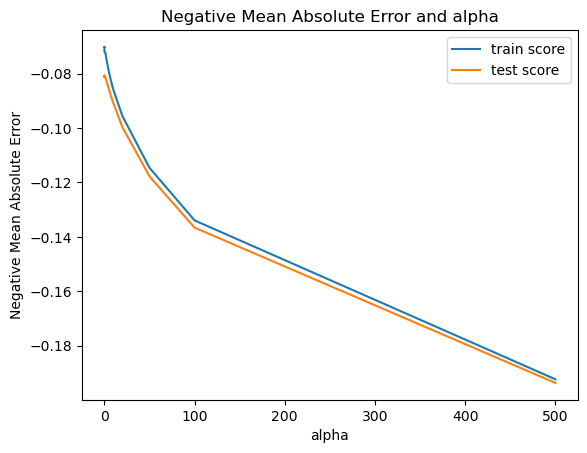

In [428]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [430]:
# Put the Features and coefficienst in a dataframe

#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [432]:
#selecting the top 5 variables
ridge_coef.sort_values(by='Mod',ascending=False).head()

,Features,Coefficient,Mod
0,MSSubClass,10.244179,10.244179
9,ExterCond,0.875819,0.875819
2,LotArea,0.467800,0.467800
3,LotShape,0.342859,0.342859
6,YearBuilt,0.298513,0.298513


In [433]:
# Prediction using ridge regression
y_train_pred = ridge.predict(X_train)
print('R2_score_train:', r2_score(y_true=y_train, y_pred=y_train_pred))

R2_score_train: 0.9329814513808519


In [434]:
y_test_pred = ridge.predict(X_test)
print('R2_score_test:', r2_score(y_true=y_test, y_pred=y_test_pred))

R2_score_test: 0.8987681391856739


## Lasso Regression

In [435]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [436]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020420,0.003911,0.004642,0.001361,0.0001,{'alpha': 0.0001},-0.081527,-0.075229,-0.080265,-0.087699,...,-0.080521,0.004184,1,-0.070262,-0.073564,-0.071333,-0.069810,-0.072064,-0.071407,0.001338
1,0.009610,0.000564,0.005201,0.001205,0.001,{'alpha': 0.001},-0.081128,-0.079240,-0.085349,-0.089125,...,-0.082924,0.003769,2,-0.077744,-0.080141,-0.078429,-0.075782,-0.079103,-0.078240,0.001461
2,0.010442,0.001767,0.004622,0.000532,0.01,{'alpha': 0.01},-0.110097,-0.114221,-0.122261,-0.118202,...,-0.115591,0.004224,3,-0.114038,-0.115440,-0.114119,-0.113717,-0.113954,-0.114254,0.000608
3,0.010223,0.002732,0.005856,0.002590,0.05,{'alpha': 0.05},-0.230606,-0.269382,-0.253546,-0.245465,...,-0.244654,0.016150,4,-0.244898,-0.241090,-0.241658,-0.244497,-0.244528,-0.243334,0.001617
4,0.008493,0.002334,0.004769,0.000951,0.1,{'alpha': 0.1},-0.278944,-0.331198,-0.299144,-0.296625,...,-0.292262,0.024974,5,-0.293638,-0.284986,-0.292594,-0.293636,-0.293639,-0.291699,0.003380


In [438]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [439]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [440]:
lasso.coef_

array([ 0.19421907,  0.49613404,  0.35882471,  0.29675391,  0.03248864,
        0.28687727,  0.03671964, -0.0380763 ,  0.89317024,  0.11881038,
       -0.05427024,  0.05948113,  0.07080343,  0.        ,  0.17858947,
        0.05825161,  0.04663498,  0.24012058,  0.14736018,  0.19243659,
        0.14878468, -0.03916778, -0.        ,  0.03405765,  0.07426409,
        0.02737379, -0.03905941,  0.06096711,  0.07251005, -0.02178571,
       -0.03924806, -0.1102913 , -0.05107854,  0.02711825, -0.04792172,
        0.02241434,  0.0270519 , -0.06355111, -0.00737199, -0.05748892,
       -0.        ,  0.        ,  0.        , -0.20912605,  0.09911654,
        0.        , -0.        ,  0.01932671,  0.        ,  0.0131893 ,
        0.02960236, -0.04961513,  0.0081795 ,  0.        ,  0.03330958,
        0.0408387 , -0.04944302,  0.02014719,  0.06073711,  0.03792599,
        0.01908451, -0.06239297,  0.0491846 ,  0.01558095,  0.04513369,
       -0.        ,  0.04096057, -0.        ,  0.09624379,  0.  

In [441]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Lasso_train_r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso_test_r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso_train_r2: 0.9329814513808519
Lasso_test_r2: 0.8987681391856739


In [442]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [443]:
lasso_coef

,Feature,Coef,mod
0,LotArea,10.312640,10.312640
1,OverallQual,0.194219,0.194219
2,OverallCond,0.496134,0.496134
3,YearBuilt,0.358825,0.358825
4,YearRemodAdd,0.296754,0.296754
...,...,...,...
85,Neighborhood_Mitchel,-0.076595,0.076595
86,Neighborhood_NPkVill,-0.040871,0.040871
87,Neighborhood_NridgHt,0.048024,0.048024
88,Neighborhood_OldTown,0.091008,0.091008


In [444]:
lasso_coef.sort_values(by='mod',ascending=False).head()

,Feature,Coef,mod
0,LotArea,10.312640,10.312640
9,BsmtFullBath,0.893170,0.893170
2,OverallCond,0.496134,0.496134
3,YearBuilt,0.358825,0.358825
4,YearRemodAdd,0.296754,0.296754


## Conclusion

 ##### significant variables in predicting the price of a house and How well those variables describe the price of a house:

- MSZoning_FV :Floating Village Residential also has significant effect in the sales price.
- GrLivArea :Above grade (ground) living area square feet also has significant increase in the sales price.
- MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
- OverallQual : Quality of over all house also has significant increase in the sales price.
- TotalBsmtSF :Total square feet of basement area is also a reason to increase in salesprice
- OverallCond : If the Overall Condition is Excellent the SalePrice is higher
- SaleCondition_Normal: Normal Sale when compared to othersales has an improvement in the sales price
- Neighborhood_Crawfor: Neighbourhod Crawford and Northridge Heights also place a role in increase the sales 

#### > Optimal value of alpha:
- Ridge: 0.3
- Lasso: 0.0001

> When we double the value of alpha which is:
- Ridge: 0.6
- Lasso: 0.0002


In [445]:
ridge = Ridge(alpha=0.6)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.20456875  0.4735282   0.33346203  0.26804135  0.03906425  0.28120174
  0.04054379 -0.03199751  0.82917376  0.11834829 -0.02381777  0.07207072
  0.08048952  0.01583504  0.19133799  0.06338637  0.05522717  0.22973154
  0.14513225  0.18157529  0.14689294 -0.04657219 -0.01923611  0.04005291
  0.08158443  0.04364908 -0.04184837  0.07249195  0.09846888 -0.02516479
 -0.03331455 -0.10949651 -0.05596657  0.05997897 -0.05281911  0.02645049
  0.0286359  -0.1040208  -0.05537415 -0.09706258 -0.04050796  0.01610662
  0.         -0.20017037  0.11572329  0.03422589 -0.04380945  0.0385761
  0.04671049  0.03204826  0.04660719 -0.04463264  0.02609525  0.03422589
  0.09449459  0.05943194 -0.06670972  0.03767059  0.07151475  0.04113886
  0.04134239 -0.09395115  0.08566253  0.05961815  0.08742272  0.02514165
  0.07568092  0.05136664  0.11697418  0.05110563  0.05911712 -0.03866463
  0.04396726  0.05707289  0.09666572 -0.03676363  0.02468527  0.05326763
  0.04396726 -0.01215433  0.12764604 -0.05174363 -0.

In [456]:
# Predticting on X_train
y_train_pred = ridge.predict(X_train)

# Checking the r2_score
ridge_train = r2_score(y_train, y_train_pred)
print('r2_train_ridge after doubling:', ridge_train)

# Predicting on the X_test
y_test_pred = ridge.predict(X_test)

# Checking the r2_score
ridge_test = r2_score(y_test, y_test_pred)
print('r2_test_ridge after doubling:', ridge_test)

r2_train_ridge after doubling: 0.9321440399754538
r2_test_ridge after doubling: 0.8986651714848642


### Lasso Regression

In [455]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print('Lasso train r2 value after doubling:',r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print('Lasso train r2 value after doubling:', r2_score(y_true=y_test,y_pred=y_test_pred))


Lasso train r2 value after doubling: 0.9089919948933693
Lasso train r2 value after doubling: 0.8860313285075364
